In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

## Load the Data

In [7]:
path = r'/Users/andrenedvidek/Desktop/Data Analaysis/CareerFoundry /Specialization/Task 2.4/Data'

In [8]:
df_2 = pd.read_csv(os.path.join(path, 'answered_cleand.csv'))

In [9]:
df = pd.read_csv(os.path.join(path, 'predicted_weather_cleand.csv'))

In [10]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

In [11]:
df.shape

(22950, 137)

In [12]:
df.dtypes

DATE                    int64
MONTH                   int64
BASEL_cloud_cover       int64
BASEL_humidity        float64
BASEL_pressure        float64
                       ...   
VALENTIA_temp_min     float64
VALENTIA_temp_max     float64
KASSEL_cloud_cover      int64
MUNCHENB_pressue      float64
STOCKHOLM_humidity    float64
Length: 137, dtype: object

In [13]:
df_2

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [14]:
df_2.dtypes

DATE                           int64
BASEL_pleasant_weather         int64
BELGRADE_pleasant_weather      int64
BUDAPEST_pleasant_weather      int64
DEBILT_pleasant_weather        int64
DUSSELDORF_pleasant_weather    int64
HEATHROW_pleasant_weather      int64
KASSEL_pleasant_weather        int64
LJUBLJANA_pleasant_weather     int64
MAASTRICHT_pleasant_weather    int64
MADRID_pleasant_weather        int64
MUNCHENB_pleasant_weather      int64
OSLO_pleasant_weather          int64
SONNBLICK_pleasant_weather     int64
STOCKHOLM_pleasant_weather     int64
VALENTIA_pleasant_weather      int64
dtype: object

In [15]:
df_2.shape

(22950, 16)

In [16]:
answers = df_2 

In [17]:
answers

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

|1961|1962|1963|1964|1965

## Preprocess the Data

In [18]:
#Reduce your dataset to a single year
dfyear = df.loc[df['DATE'].astype(str).str[:4].isin(['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'])] #<-----INSERT YEAR HERE
dfyear

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958  19900101      1                  0            0.83          1.0217   
10959  19900102      1                  2            0.84          1.0238   
10960  19900103      1                  8            0.89          1.0231   
10961  19900104      1                  2            0.77          1.0265   
10962  19900105      1                  7            0.81          1.0286   
...         ...    ...                ...             ...             ...   
14605  19991227     12                  7            0.74          0.9953   
14606  19991228     12                  8            0.88          0.9956   
14607  19991229     12                  8            0.84          1.0162   
14608  19991230     12                  7            0.80          1.0276   
14609  19991231     12                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   
...                ...             ...             ...                   ...   
14605              5.0             1.5             6.5                     5   
14606              2.4             1.0             3.4                     8   
14607              1.8             1.0             2.7                     6   
14608              1.1            -0.3             3.4                     3   
14609              0.7            -0.7             1.9                     7   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
10958               0.86             1.0246                       0.19   
10959               0.83             1.0235                       0.18   
10960               0.88             1.0241                       0.18   
10961               0.86             1.0327                       0.39   
10962               0.62             1.0338                       1.06   
...                  ...                ...                        ...   
14605               0.88             0.9957                       0.24   
14606               0.85             0.9873                       0.24   
14607               0.80             1.0074                       0.24   
14608               0.87             1.0240                       0.61   
14609               0.93             1.0237                       0.24   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
10958                    0.00                5.3                -1.3   
10959                    0.03                0.0                -0.9   
10960                    0.11                0.0                -0.8   
10961                    0.00                0.0                -3.1   
10962                    0.00      

In [19]:
#Reduce your dataset to a single year
dfyear_answers = df_2.loc[df_2['DATE'].astype(str).str[:4].isin(['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'])] #<-----INSERT YEAR HERE
dfyear_answers

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958  19900101                       0                          0   
10959  19900102                       0                          0   
10960  19900103                       0                          0   
10961  19900104                       0                          0   
10962  19900105                       0                          0   
...         ...                     ...                        ...   
14605  19991227                       0                          0   
14606  19991228                       0                          0   
14607  19991229                       0                          0   
14608  19991230                       0                          0   
14609  19991231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   
...                          ...                      ...   
14605                          0                        0   
14606                          0                        0   
14607                          0                        0   
14608                          0                        0   
14609                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   
...                            ...                        ...   
14605                            0                          0   
14606                            0                          0   
14607                            0                          0   
14608                            0                          0   
14609                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   
...                        ...                         ...   
14605                        0                           0   
14606                        0                           0   
14607                        0                           0   
14608                        0                           0   
14609                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   
...                            ...                      ...   
14605                            0                        0   
14606                            0                        0   
14607                            0                        0   
14608                            0                        0   
14609                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                          0    

In [20]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
dfyear= dfyear.drop(['DATE','MONTH'], axis=1)

In [21]:
dfyear_answers = dfyear_answers.drop(['DATE'], axis=1)

In [22]:
dfyear.shape

(3652, 135)

In [23]:
dfyear_answers.shape

(3652, 15)

In [24]:
X = dfyear

In [25]:
Y = dfyear_answers.max(axis=1)
print("Shape Y:", Y.shape)

Shape Y: (3652,)


In [26]:
X.shape

(3652, 135)

In [27]:
Y.shape


(3652,)

In [28]:
# Split data into train and test set

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 42)

In [29]:
# Check shapes
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2739, 135) (2739,)
(913, 135) (913,)


## Part 1

## GRID SEARCH for the year 1990 - 1999

In [31]:
# creating a RF classifier
clf = RandomForestClassifier()

In [32]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [35]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, Y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.910 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.912 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.913 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.913 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END m

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.924 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.924 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.921 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.912 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_sp

Search took 0.46655364433924357 minutes


In [36]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.9543629061701351


## RANDOM SEARCH for the year 1990 - 1999

In [38]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [39]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [40]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, Y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.921 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.917 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.928 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.920 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.916 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.924 total time=   0.1s
[CV 3/3] E

[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.917 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.919 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.908 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.907 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.920 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.919 total time=   0.2s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.913 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.910 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.926 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.921 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.912 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.921 total time=   0.2s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.929 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.911 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_sp

[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.896 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.919 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.916 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=

[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.923 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.906 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.917 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.917 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.920 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_

Search took 0.7006240169207255 minutes


In [41]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 360}
Best RANDOM search score is: 0.9536327126688572


In [42]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.9543629061701351
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 360}
Best RANDOM search score is: 0.9536327126688572


In [43]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 100, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_features=7)

In [44]:
# performing predictions on the test dataset
Y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Model Accuracy:  0.9583789704271632


## Random Forest Model

[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.947 total time=   0.4s
[CV 3/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.933 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.955 total time=   0.4s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.958 total time=   0.8s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.946 total time=   0.7s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=160;, score=0.933 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.927 total time=   0.0s
[CV 2/3] END criter

[CV 1/3] END criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=460;, score=0.946 total time=   0.8s
[CV 2/3] END criterion=gini, max_depth=90, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=210;, score=0.943 total time=   0.5s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=260;, score=0.943 total time=   0.6s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=6, n_estimators=160;, score=0.934 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=6, n_estimators=160;, score=0.929 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=460;, score=0.951 total time=   1.0s
[CV 3/3] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n

[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_spl

[CV 1/3] END criterion=gini, max_depth=50, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=160;, score=0.946 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=210;, score=0.934 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=80, max_features=1, min_samples_leaf=1, min_samples_split=8, n_estimators=310;, score=0.926 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=10;, score=0.932 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=10;, score=0.934 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=310;, score=0.952 total time=   0.6s
[CV 3/3] END criterion=entropy, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_sp

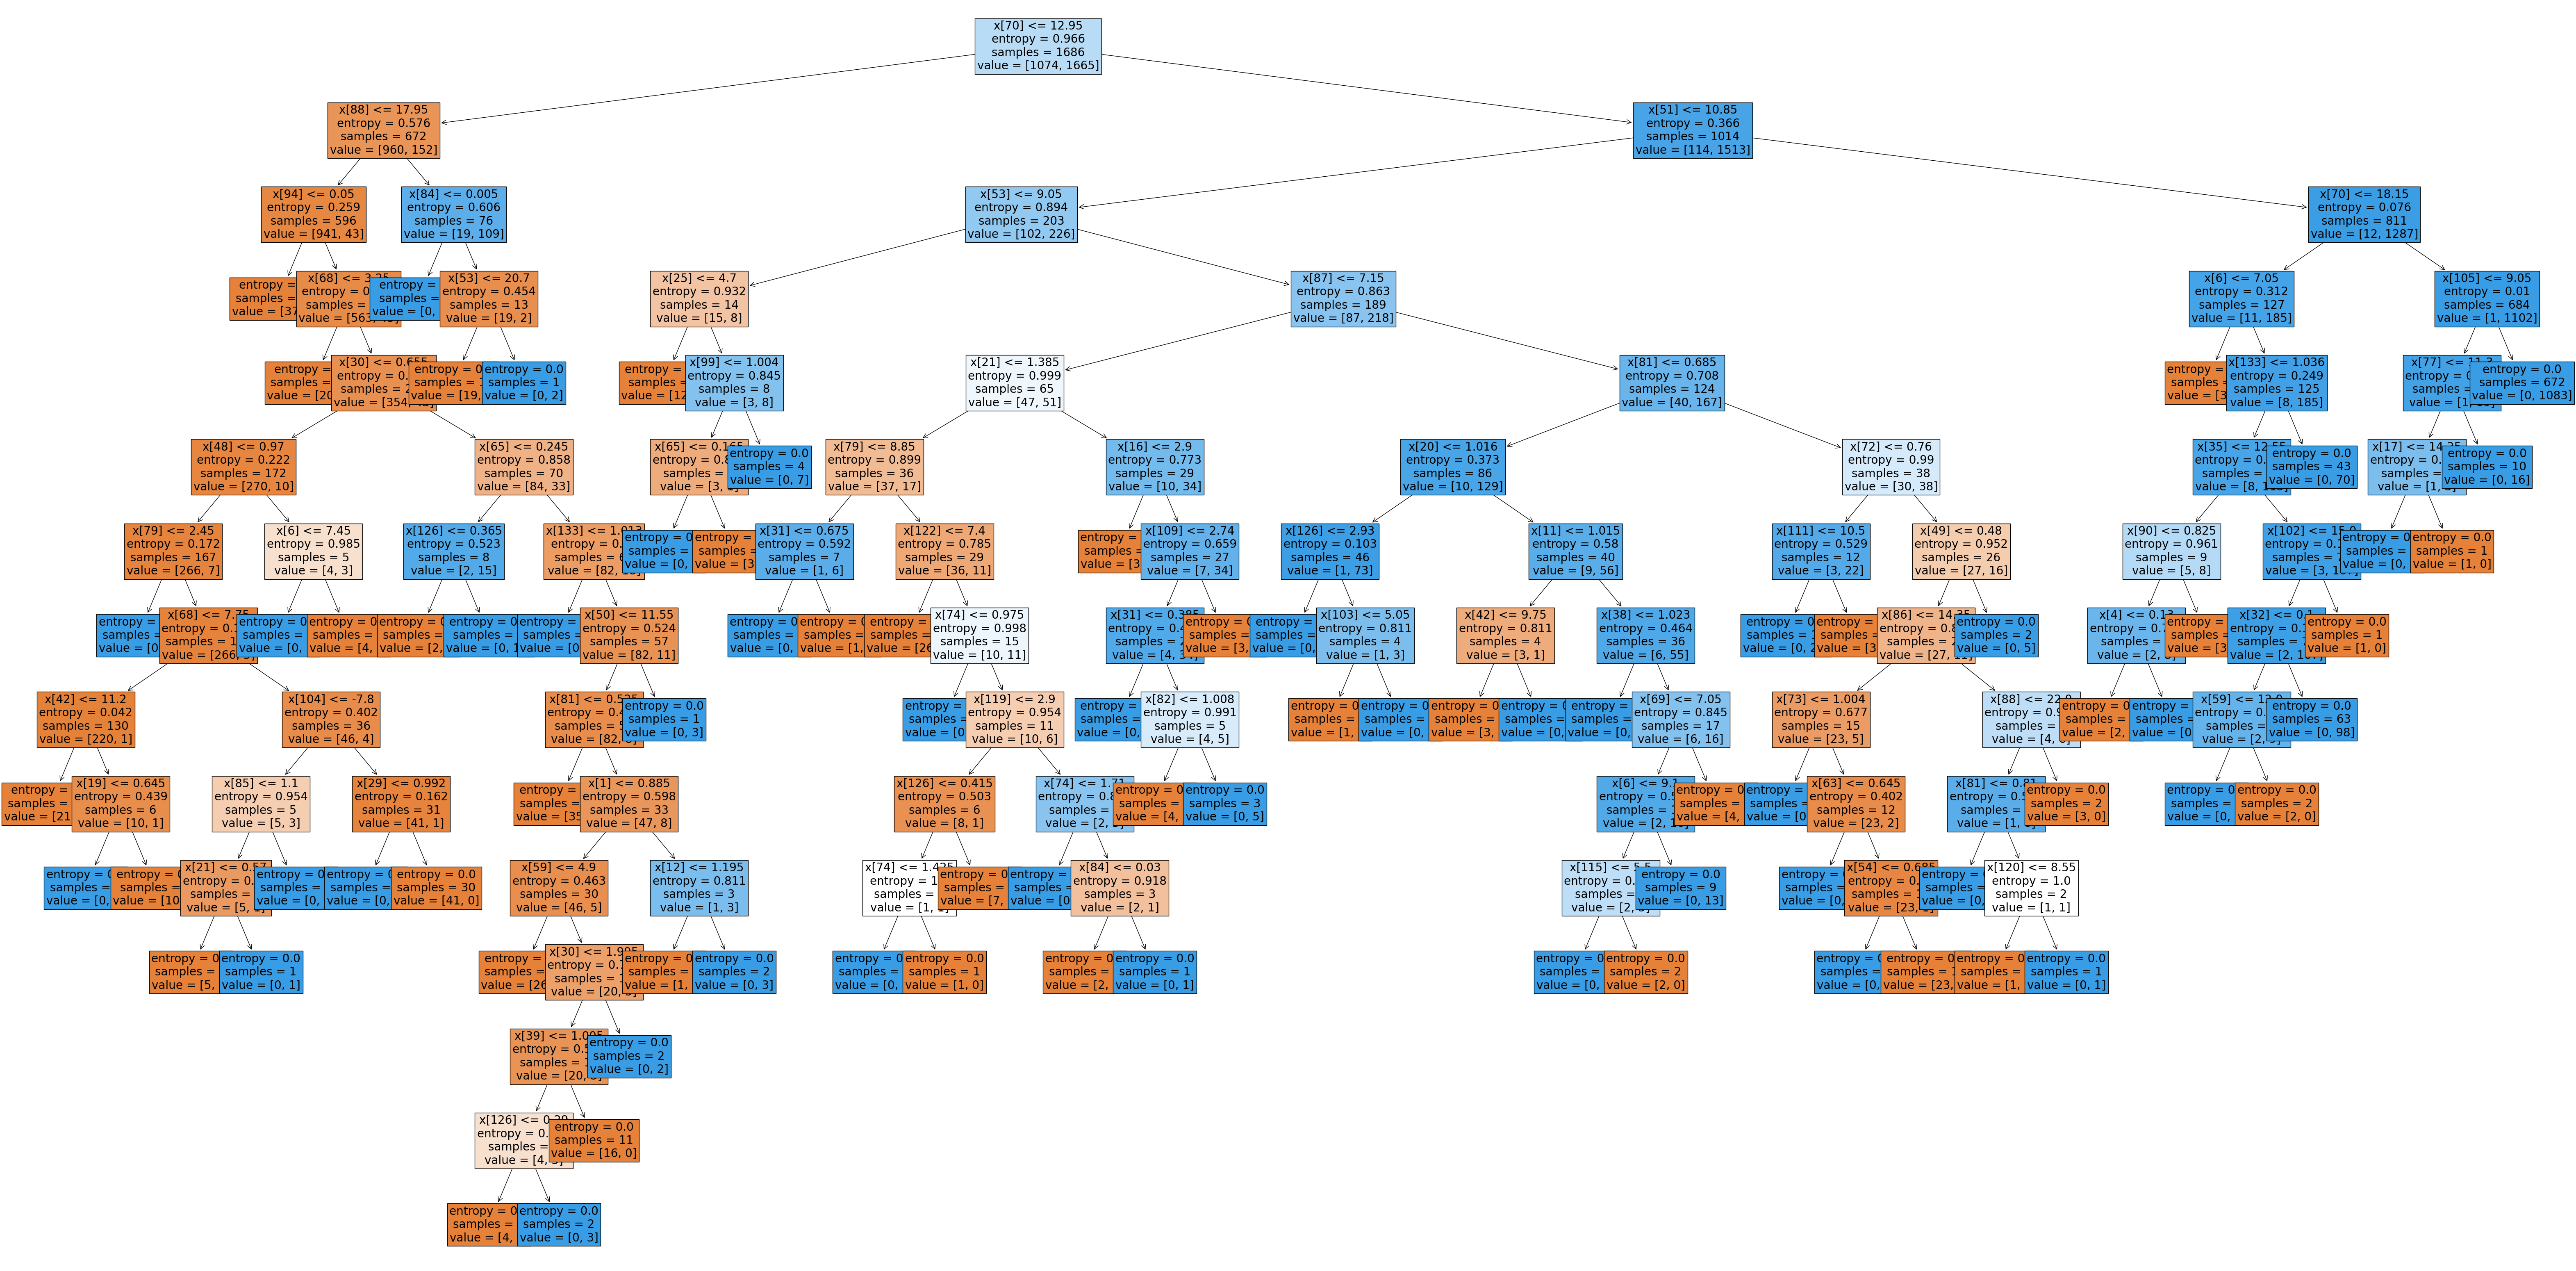

In [45]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, filled=True);

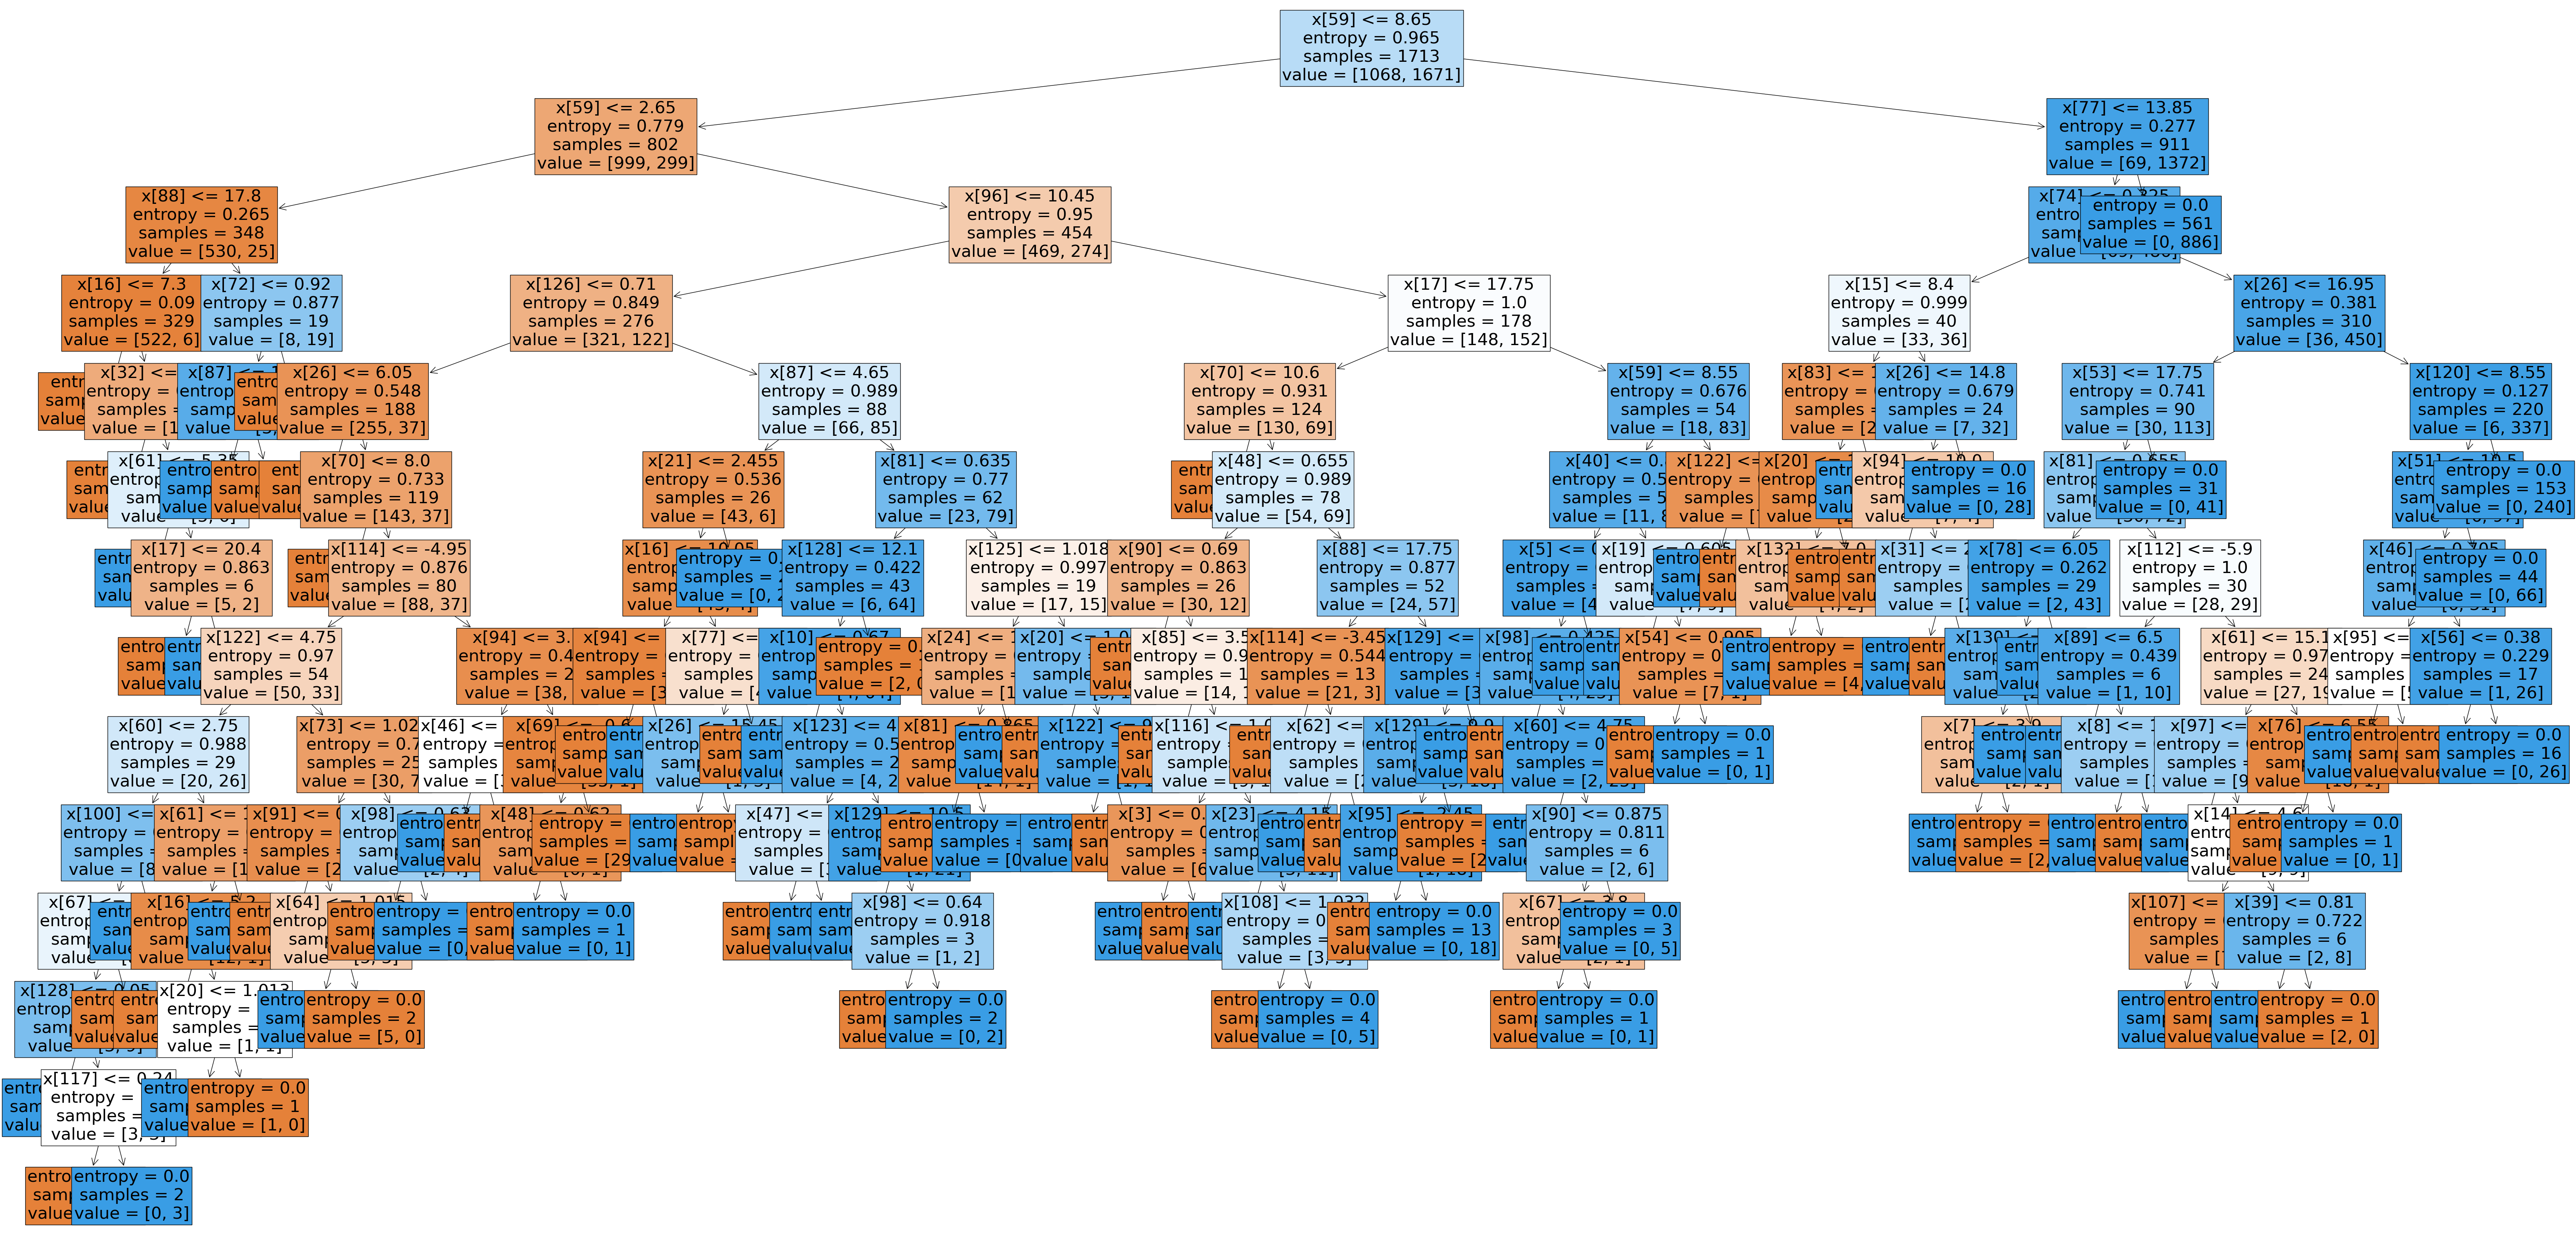

In [47]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[99], fontsize = 30, filled=True);

In [48]:
City = ['Basel',
    'Belgrade',
    'Budapest',
    'Debilt',
    'Dusseldorf',
    'Heathrow',
    'Kassel',
    'Ljubljana',
    'Maastricht',
    'Madrid',
    'Munchenb',
    'Oslo',
    'Sonnblick',
    'Stockholm',
    'Valentia'
      ]

In [50]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00110898, 0.00203932, 0.00208124, 0.00328103, 0.00151398,
       0.0010709 , 0.02525052, 0.00310596, 0.03093139, 0.00158749,
       0.00388309, 0.00152408, 0.00617997, 0.00283253, 0.00299842,
       0.01656491, 0.01600573, 0.02574062, 0.00097352, 0.00197123,
       0.00208737, 0.00681673, 0.00134074, 0.00404421, 0.02330135,
       0.02007021, 0.04085466, 0.0006385 , 0.00110618, 0.00196741,
       0.00329703, 0.00102793, 0.00189321, 0.00339259, 0.00206345,
       0.03130724, 0.00087885, 0.00203546, 0.00198491, 0.00468728,
       0.00095376, 0.00139115, 0.02079789, 0.00212289, 0.01866295,
       0.00052302, 0.00224427, 0.001384  , 0.01219664, 0.00073403,
       0.00223198, 0.01518297, 0.00308548, 0.00501239, 0.001589  ,
       0.001808  , 0.00309201, 0.00096231, 0.00143999, 0.03697766,
       0.00665773, 0.02016081, 0.00075527, 0.00242339, 0.00205407,
       0.0086363 , 0.00115992, 0.0014147 , 0.03090905, 0.01216084,
       0.0634548 , 0.0006738 , 0.00137297, 0.00128631, 0.00296

In [51]:
np.set_printoptions(threshold=1000)

In [52]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00110898, 0.00203932, 0.00208124, 0.00328103, 0.00151398,
         0.0010709 , 0.02525052, 0.00310596, 0.03093139],
        [0.00158749, 0.00388309, 0.00152408, 0.00617997, 0.00283253,
         0.00299842, 0.01656491, 0.01600573, 0.02574062],
        [0.00097352, 0.00197123, 0.00208737, 0.00681673, 0.00134074,
         0.00404421, 0.02330135, 0.02007021, 0.04085466],
        [0.0006385 , 0.00110618, 0.00196741, 0.00329703, 0.00102793,
         0.00189321, 0.00339259, 0.00206345, 0.03130724],
        [0.00087885, 0.00203546, 0.00198491, 0.00468728, 0.00095376,
         0.00139115, 0.02079789, 0.00212289, 0.01866295],
        [0.00052302, 0.00224427, 0.001384  , 0.01219664, 0.00073403,
         0.00223198, 0.01518297, 0.00308548, 0.00501239],
        [0.001589  , 0.001808  , 0.00309201, 0.00096231, 0.00143999,
         0.03697766, 0.00665773, 0.02016081, 0.00075527],
        [0.00242339, 0.00205407, 0.0086363 , 0.00115992, 0.0014147 ,
         0.03090905, 0.01216084, 0.0634548

In [53]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.07038332, 0.07731684, 0.10146001, 0.04669354, 0.05351515,
       0.04259478, 0.07344279, 0.12288687, 0.05374103, 0.14862905,
       0.0464122 , 0.05355457, 0.01889796, 0.06473564, 0.02573625])

In [54]:
important = pd.Series(sumarray, index = City) #.sort_values(ascending = False)
important

Basel         0.070383
Belgrade      0.077317
Budapest      0.101460
Debilt        0.046694
Dusseldorf    0.053515
Heathrow      0.042595
Kassel        0.073443
Ljubljana     0.122887
Maastricht    0.053741
Madrid        0.148629
Munchenb      0.046412
Oslo          0.053555
Sonnblick     0.018898
Stockholm     0.064736
Valentia      0.025736
dtype: float64

['Basel', 'Belgrade', 'Budapest', 'Debilt', 'Dusseldorf', 'Heathrow', 'Kassel', 'Ljubljana', 'Maastricht', 'Madrid', 'Munchenb', 'Oslo', 'Sonnblick', 'Stockholm', 'Valentia']


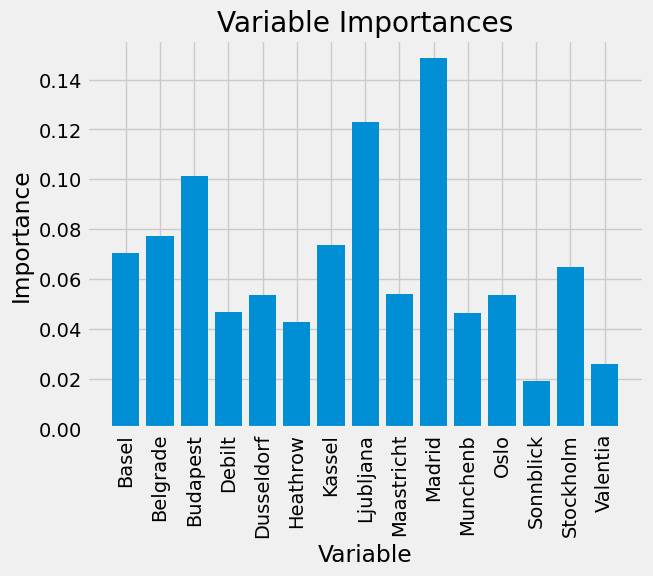

In [55]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(City)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, City, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### Madrid Budapest and Ljubljana have the most influence on the random forest 